In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [6]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\3.concertriccir2.csv',header=None)

In [7]:
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [8]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

<Axes: xlabel='0', ylabel='1'>

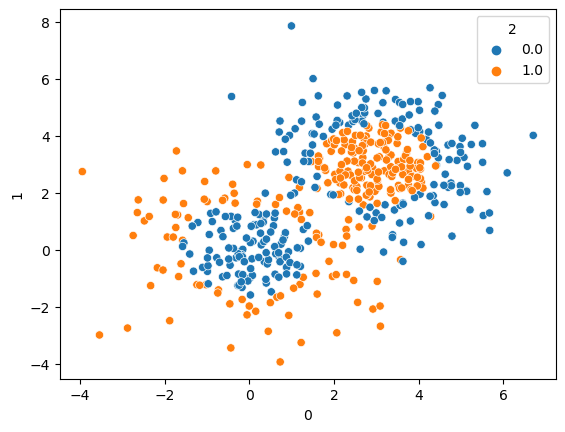

In [9]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [11]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [28]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L1(0.007),bias_regularizer=L1(0.007),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L1(0.007),bias_regularizer=L1(0.007)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L1(0.007),bias_regularizer=L1(0.007)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.007),bias_regularizer=L1(0.007)))

In [29]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
81/81 [==============================] - 2s 10ms/step - loss: 0.9452 - accuracy: 0.4395 - val_loss: 0.9062 - val_accuracy: 0.5778
Epoch 2/20
81/81 [==============================] - 0s 5ms/step - loss: 0.9320 - accuracy: 0.4395 - val_loss: 0.9072 - val_accuracy: 0.5556
Epoch 3/20
81/81 [==============================] - 0s 5ms/step - loss: 0.9224 - accuracy: 0.4370 - val_loss: 0.9075 - val_accuracy: 0.5778
Epoch 4/20
81/81 [==============================] - 0s 4ms/step - loss: 0.9147 - accuracy: 0.4395 - val_loss: 0.9084 - val_accuracy: 0.5333
Epoch 5/20
81/81 [==============================] - 0s 5ms/step - loss: 0.9086 - accuracy: 0.4667 - val_loss: 0.9090 - val_accuracy: 0.4889
Epoch 6/20
81/81 [==============================] - 0s 5ms/step - loss: 0.9035 - accuracy: 0.5630 - val_loss: 0.9097 - val_accuracy: 0.4889
Epoch 7/20
81/81 [==============================] - 0s 5ms/step - loss: 0.8991 - accuracy: 0.5580 - val_loss: 0.9097 - val_accuracy: 0.4667
Epoch 8/20
81/81 [=

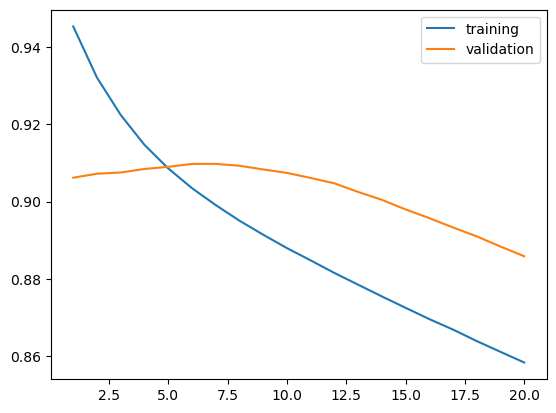

In [30]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 27s 3ms/step


<Axes: >

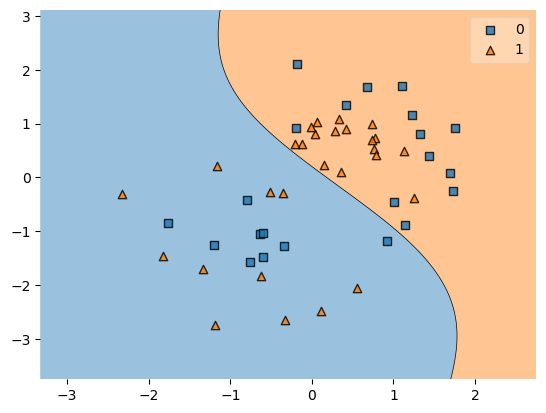

In [31]:
plot_decision_regions(x_testp,y_test.values,clf=model)